/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Vector of Weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


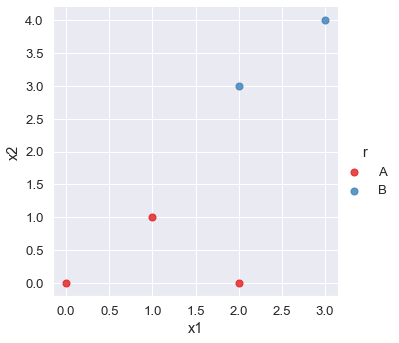

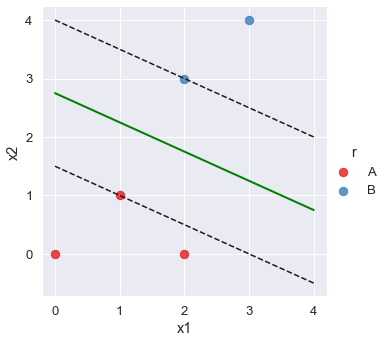

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt


d = {
    'x1' : [0,1,2,2,3],
    'x2' : [0,1,3,0,4],
    'r' : ['A','A','B','A','B']
}

data = pd.DataFrame(d)

sns.lmplot('x1','x2',
           data=data, 
           hue = 'r', 
           palette = 'Set1', 
           fit_reg = False, 
           scatter_kws={"s": 50});

from sklearn import svm
points = data[['x1','x2']].values
results = data['r']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, results)

print('Vector of Weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w = clf.coef_[0]
slope = -w[0]/w[1]
b= clf.intercept_[0]

xx = np.linspace(0,4)
yy = slope*xx -(b/w[1])

#first support vector
s = clf.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

#second support vector
s = clf.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])

sns.lmplot('x1','x2', data = data, hue = 'r', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx,yy, linewidth=2, color = 'green')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--')

